In [1]:
%load_ext google.cloud.bigquery
from google.cloud import bigquery

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [3]:
from datetime import datetime 

In [3]:
#client = bigquery.Client()

In [4]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/jf_data.csv',usecols=['event_name', 'event_date_partition', 'event_params__activity_total_time', 'event_params__video_title', 'event_params__videotitle', 'geo__country', 'geo__city', 'user_pseudo_id'], low_memory=False)

In [5]:
df = data.copy()

In [6]:
df.head()

,event_date_partition,event_name,event_params__activity_total_time,event_params__video_title,event_params__videotitle,geo__city,geo__country,user_pseudo_id
0,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
1,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
2,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
3,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
4,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082


In [7]:
df.user_pseudo_id.value_counts()

AA38C84A3E1442048F72096A4621C17A    515
408BAF780ACD4F53B3F245E87ABF44A8     72
1AE4EF46D71643F386340D1630CC6082     59
C014B9176D834F9BBABE0ADCB8CE5AD6     53
0528B26980524C1F9ABC1E4C774F166F     46
E992B0A12520496E907C49B34D5D06AA     37
13C48EA918E847E1B244EB71A4C26D1C     34
79FF838CEE1A46D8BDEFDF592E0C705C     26
A1C4AB74010F44AF810FC0C27DB2CEED     26
CF7EADF45A224C1E9DEDF65BE9CDD3BA     24
028CB403405B4A12B4485F19269A82B3     24
CE056F19B87545C0A5AA24CBF89C0A3B     16
3B95E8EE13824C758CEF5922F38C5223     15
BD05492D137A4320AAB293DEEB0ACEB1      9
EC830E447FE74E2CAD9894D0F8AEA9EA      8
C9A8CC50D22D469DB0F2C874C6AD046C      8
AA431089D4094D95AAC16ACB266F245F      8
CEA6AB178A20458D9BBC81607665D7D7      8
5DE009489F844FF18959E60EB836B00B      7
72F32A73B229415FBF37B36DFD104A24      4
FD7E053248C94B5BB31CC094C1AE0B18      1
Name: user_pseudo_id, dtype: int64

In [8]:
#df.dropna(inplace=True, subset=['event_params__engagement_time_msec'])

In [9]:
df.shape

(1000, 8)

In [10]:
df.head()

,event_date_partition,event_name,event_params__activity_total_time,event_params__video_title,event_params__videotitle,geo__city,geo__country,user_pseudo_id
0,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
1,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
2,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
3,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
4,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082


<AxesSubplot:>

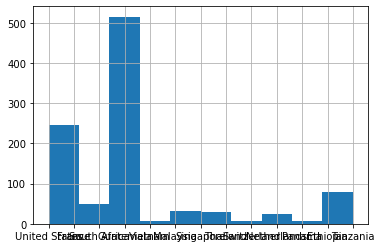

In [11]:
df.geo__country.hist()

In [12]:
df.geo__city.value_counts()

Guatemala City             515
Bordeaux                    72
Corvallis                   59
Addis Ababa                 46
Sudbury                     37
Dar es Salaam               34
Kuala Lumpur                32
Denver                      26
Emalahleni                  26
Johannesburg                24
Leiden                      24
Singapore                   21
Lowell                      16
Colorado Springs            15
Lexington                    9
Mueang Lampang District      8
Panama City                  8
Meggen                       8
Ho Chi Minh City             8
Hot Springs                  7
Nashville                    4
Minneapolis                  1
Name: geo__city, dtype: int64

In [13]:
guat_city_df = df[df['geo__city'] == 'Guatemala City']

In [22]:
guat_city_df.event_name.value_counts()

screen_view        325
user_engagement    188
session_start        1
first_open           1
Name: event_name, dtype: int64

In [24]:
guat_city_df.user_pseudo_id.value_counts()

AA38C84A3E1442048F72096A4621C17A    515
Name: user_pseudo_id, dtype: int64

In [17]:
df.head()

,event_date_partition,event_name,event_params__activity_total_time,event_params__video_title,event_params__videotitle,geo__city,geo__country,user_pseudo_id
0,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
1,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
2,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
3,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082
4,2020-10-08T00:00:00,screen_view,NaN,NaN,NaN,Corvallis,United States,1AE4EF46D71643F386340D1630CC6082


In [18]:
df.user_pseudo_id.value_counts()

AA38C84A3E1442048F72096A4621C17A    515
408BAF780ACD4F53B3F245E87ABF44A8     72
1AE4EF46D71643F386340D1630CC6082     59
C014B9176D834F9BBABE0ADCB8CE5AD6     53
0528B26980524C1F9ABC1E4C774F166F     46
E992B0A12520496E907C49B34D5D06AA     37
13C48EA918E847E1B244EB71A4C26D1C     34
79FF838CEE1A46D8BDEFDF592E0C705C     26
A1C4AB74010F44AF810FC0C27DB2CEED     26
CF7EADF45A224C1E9DEDF65BE9CDD3BA     24
028CB403405B4A12B4485F19269A82B3     24
CE056F19B87545C0A5AA24CBF89C0A3B     16
3B95E8EE13824C758CEF5922F38C5223     15
BD05492D137A4320AAB293DEEB0ACEB1      9
CEA6AB178A20458D9BBC81607665D7D7      8
AA431089D4094D95AAC16ACB266F245F      8
EC830E447FE74E2CAD9894D0F8AEA9EA      8
C9A8CC50D22D469DB0F2C874C6AD046C      8
5DE009489F844FF18959E60EB836B00B      7
72F32A73B229415FBF37B36DFD104A24      4
FD7E053248C94B5BB31CC094C1AE0B18      1
Name: user_pseudo_id, dtype: int64

In [19]:
#top user AA38C84A3E1442048F72096A4621C17A. Mr. Guatamala City

In [20]:
# dropany_df = drop_df.dropna(axis='columns', how='all')
# #how='any': 1000X24. how='all': 1000x49

In [21]:
df.event_name.value_counts()
#what is the def of these categories?

screen_view        615
user_engagement    345
session_start       25
app_update           5
first_open           5
os_update            5
Name: event_name, dtype: int64

In [22]:
df.user_pseudo_id.value_counts()

AA38C84A3E1442048F72096A4621C17A    515
408BAF780ACD4F53B3F245E87ABF44A8     72
1AE4EF46D71643F386340D1630CC6082     59
C014B9176D834F9BBABE0ADCB8CE5AD6     53
0528B26980524C1F9ABC1E4C774F166F     46
E992B0A12520496E907C49B34D5D06AA     37
13C48EA918E847E1B244EB71A4C26D1C     34
79FF838CEE1A46D8BDEFDF592E0C705C     26
A1C4AB74010F44AF810FC0C27DB2CEED     26
CF7EADF45A224C1E9DEDF65BE9CDD3BA     24
028CB403405B4A12B4485F19269A82B3     24
CE056F19B87545C0A5AA24CBF89C0A3B     16
3B95E8EE13824C758CEF5922F38C5223     15
BD05492D137A4320AAB293DEEB0ACEB1      9
CEA6AB178A20458D9BBC81607665D7D7      8
AA431089D4094D95AAC16ACB266F245F      8
EC830E447FE74E2CAD9894D0F8AEA9EA      8
C9A8CC50D22D469DB0F2C874C6AD046C      8
5DE009489F844FF18959E60EB836B00B      7
72F32A73B229415FBF37B36DFD104A24      4
FD7E053248C94B5BB31CC094C1AE0B18      1
Name: user_pseudo_id, dtype: int64

# user analysis

In [23]:
user1 = df[df['user_pseudo_id'] == '1AE4EF46D71643F386340D1630CC6082']

In [24]:
user2 = df[df['user_pseudo_id'] == 'AA38C84A3E1442048F72096A4621C17A']

In [25]:
user2.geo__city

209    Guatemala City
210    Guatemala City
211    Guatemala City
212    Guatemala City
213    Guatemala City
            ...      
719    Guatemala City
720    Guatemala City
721    Guatemala City
722    Guatemala City
723    Guatemala City
Name: geo__city, Length: 515, dtype: object

In [26]:
user2.columns

Index(['event_date_partition', 'event_name',
       'event_params__activity_total_time', 'event_params__video_title',
       'event_params__videotitle', 'geo__city', 'geo__country',
       'user_pseudo_id'],
      dtype='object')

In [27]:
user3 = df[df['user_pseudo_id'] == '408BAF780ACD4F53B3F245E87ABF44A8']

In [28]:
user3.iloc[0]

event_date_partition                              2020-10-08T00:00:00
event_name                                                screen_view
event_params__activity_total_time                                 NaN
event_params__video_title                                         NaN
event_params__videotitle                                          NaN
geo__city                                                    Bordeaux
geo__country                                                   France
user_pseudo_id                       408BAF780ACD4F53B3F245E87ABF44A8
Name: 74, dtype: object

In [29]:
user4 = df[df['user_pseudo_id'] == 'FD7E053248C94B5BB31CC094C1AE0B18']

In [30]:
user4.iloc[0]

event_date_partition                              2020-10-08T00:00:00
event_name                                            user_engagement
event_params__activity_total_time                                 NaN
event_params__video_title                                         NaN
event_params__videotitle                                          NaN
geo__city                                                 Minneapolis
geo__country                                            United States
user_pseudo_id                       FD7E053248C94B5BB31CC094C1AE0B18
Name: 895, dtype: object

In [31]:
df.event_date_partition.value_counts()

2020-10-08T00:00:00    965
2020-10-07T00:00:00     29
2020-10-06T00:00:00      6
Name: event_date_partition, dtype: int64

# city of austin analysis

In [50]:
austin_csv = pd.read_csv('/Users/djbetts/Desktop/jf_project/austin_dataset.csv')

In [51]:
austin_df = austin_csv.copy()

In [52]:
austin_df.shape

(1000, 204)

In [53]:
austindrop_df = austin_df.dropna(axis='columns', how='all')

In [54]:
austindrop_df.shape

(1000, 118)

In [55]:
list(austindrop_df.columns)

['app_info__firebase_app_id',
 'app_info__id',
 'app_info__install_source',
 'app_info__version',
 'device__advertising_id',
 'device__category',
 'device__is_limited_ad_tracking',
 'device__language',
 'device__mobile_brand_name',
 'device__mobile_marketing_name',
 'device__mobile_model_name',
 'device__mobile_os_hardware_model',
 'device__operating_system',
 'device__operating_system_version',
 'device__time_zone_offset_seconds',
 'device__vendor_id',
 'device__web_info__browser',
 'device__web_info__browser_version',
 'device__web_info__hostname',
 'event_bundle_sequence_id',
 'event_date',
 'event_date_partition',
 'event_name',
 'event_params__activity_exit_code',
 'event_params__activity_id',
 'event_params__activity_total_time',
 'event_params__activity_type',
 'event_params__api_session_id',
 'event_params__app_name',
 'event_params__app_store_package_name',
 'event_params__campaign',
 'event_params__client_id_ua',
 'event_params__cookieDomain',
 'event_params__country',
 'even

In [56]:
austindrop_df.event_params__event_timestamp

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    NaN
Name: event_params__event_timestamp, Length: 1000, dtype: object

In [57]:
videoplay = austindrop_df[austindrop_df['event_name'] == 'videoplay']

In [58]:
videoplay.event_params__videotitle.value_counts()

The Beginning                  4
Legion                         2
Book of Acts                   2
المقدمة                        1
JESUS                          1
#FallingPlates                 1
7. Jesus Our Living Water      1
8 أيام مع يسوع: من هو يسوع؟    1
Name: event_params__videotitle, dtype: int64

In [59]:
austindrop_df.user_pseudo_id.value_counts()

be1c6bd7b275d81bbeab423055f4ab8d    47
09D278E9375D4AEA8BE3416EBF2A90C1    33
286805041.1615869113                28
89AA3EB5C7A7454581E415483D30CDA1    26
3d33e9869d10aa68a6a9fe44362f31db    24
                                    ..
114218335.1607435843                 1
1962503349.1607289550                1
1339027143.1607054220                1
1548006143.1607808509                1
45369475.1608152848                  1
Name: user_pseudo_id, Length: 362, dtype: int64

In [60]:
df = austindrop_df

In [61]:
user1 = df[df.user_pseudo_id == 'be1c6bd7b275d81bbeab423055f4ab8d']

In [62]:
user2 = df[df.user_pseudo_id == '09D278E9375D4AEA8BE3416EBF2A90C1']

In [63]:
user3 = df[df.user_pseudo_id == '286805041.1615869113']

In [64]:
df.event_date.value_counts()

20210316    98
20201214    87
20210315    86
20201218    78
20201215    51
20201220    45
20201207    44
20201228    41
20201217    39
20201216    32
20201203    28
20201209    25
20201212    25
20201222    25
20201202    24
20201206    23
20201221    23
20201211    22
20201213    21
20201224    20
20201204    18
20201208    18
20201205    16
20201226    16
20201223    16
20201227    15
20201219    12
20201201    11
20201225    11
20201210    10
20201229     8
20201230     7
20201231     5
Name: event_date, dtype: int64

In [65]:
df['event_date_partition'] = df.event_date_partition.apply(pd.to_datetime)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df.sort_values(by=['event_date_partition'], axis=0, inplace=True)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



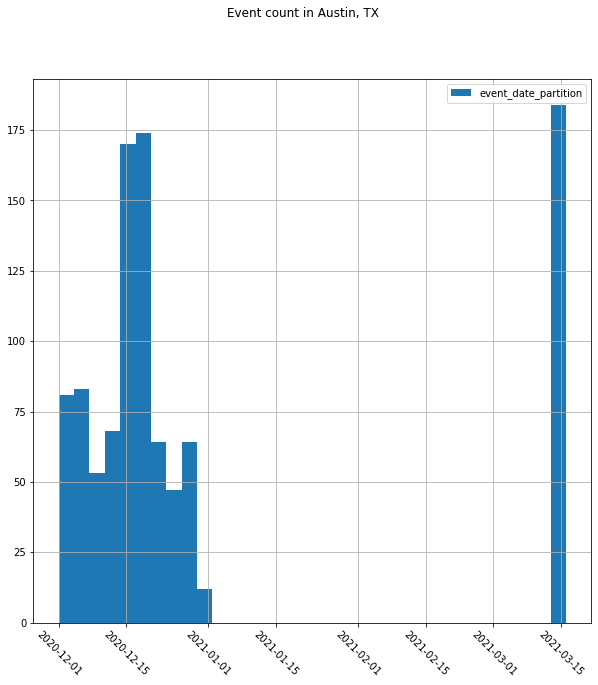

In [67]:
df.event_date_partition.hist(bins=len(df.event_date_partition.unique()),
                                      xrot=315, 
                                      figsize=(10,10), legend=True)
plt.suptitle("Event count in Austin, TX");

In [68]:
#filter event_date_partition by datetime object. cool trick.

filter_xmas_df = df[(df['event_date_partition']>pd.Timestamp(2021,1,1)) & (df['event_date_partition']<pd.Timestamp(2021,3,16))]


In [69]:
filter_xmas_df.event_name.value_counts()

user_engagement            18
page_view                  15
session_start              14
screen_view                 9
first_visit                 7
scroll                      2
activity_completes          2
a_media_progress90          2
videostarts                 2
a_media_progress50          2
a_media_progress25          2
videoplay                   2
a_media_progress75          2
a_media_progress10          2
mobileforegroundsession     1
tab_switch_home             1
tap_interest                1
app_remove                  1
os_update                   1
Name: event_name, dtype: int64

# data mapped

In [26]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [27]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [29]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/recommender_eda.csv')

In [30]:
geo_df = data.copy()

In [31]:
geo_df.columns

Index(['event_name', 'event_date_partition',
       'event_params__activity_total_time', 'event_params__video_title',
       'event_params__videotitle', 'geo__country', 'geo__city',
       'user_pseudo_id'],
      dtype='object')

In [32]:
geo_df['geo_codes'] = geo_df.geo__country.apply(get_continent)

In [33]:
geo_df['country_code'] = geo_df['geo_codes'].apply(lambda x: x[0])

In [34]:
geo_df['continent_code'] = geo_df['geo_codes'].apply(lambda x: x[1])

In [35]:
sum(geo_df['country_code'] == 'Unknown')

13

In [36]:
test = geo_df.geo_codes.iloc[0]

In [37]:
test[0]

'US'

In [38]:
import geopy

In [39]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [40]:
geopy.geocoders.options.default_user_agent = "my-application"

In [41]:
geolocator = Nominatim(user_agent="myGeocoder")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (np.nan, np.nan)

In [ ]:
# %%time
# print(datetime.now)
# geo_df['geo_cords'] = geo_df['country_code'].apply(geolocate)

In [ ]:
#geo_df['latitude'] = geo_df['geo_cords'].apply(lambda x: x[0])

In [127]:
#geo_df['longitude'] = geo_df['geo_cords'].apply(lambda x: x[1])

In [129]:
#geo_df.to_csv('with_coord.csv')

In [6]:
data = pd.read_csv('with_coord.csv', index_col='Unnamed: 0')

In [7]:
df = data.copy()

In [8]:
df.head()

,event_name,event_date_partition,event_params__activity_total_time,event_params__video_title,event_params__videotitle,geo__country,geo__city,user_pseudo_id,geo_codes,country_code,continent_code,geo_cords,latitude,longitude
0,videoplay,2021-03-14T00:00:00,NaN,NaN,Sinful Woman Forgiven,United States,Orlando,2994fe07550c47cfaaeefbf3bde8533e,"('US', 'NA')",US,NaN,"(39.7837304, -100.4458825)",39.783730,-100.445882
1,videoplay,2021-03-14T00:00:00,NaN,JESUS,NaN,United States,Roseville,54EF9DB10E8542CD8504DAB112847B7F,"('US', 'NA')",US,NaN,"(39.7837304, -100.4458825)",39.783730,-100.445882
2,videoplay,2021-03-14T00:00:00,NaN,Jesus is Crucified,NaN,United States,Williams Bay,1904427109.1610834082,"('US', 'NA')",US,NaN,"(39.7837304, -100.4458825)",39.783730,-100.445882
3,videoplay,2021-03-14T00:00:00,NaN,Jesus Calms the Storm,NaN,South Africa,Cape Town,1194736409.1615780650,"('ZA', 'AF')",ZA,AF,"(-28.579397200000002, 24.086794125366062)",-28.579397,24.086794
4,videoplay,2021-03-14T00:00:00,NaN,Friends and Enemies,NaN,United States,San Bernardino,9E9D301A1ACD442D9DCB423EE9424C7A,"('US', 'NA')",US,NaN,"(39.7837304, -100.4458825)",39.783730,-100.445882


In [9]:
sum(df.event_params__video_title.isna())

11

In [10]:
sum(df.event_params__videotitle.isna())

989

In [11]:
df['video_title'] = df['event_params__videotitle'].fillna(df['event_params__video_title'])





In [12]:
df['video_title'].value_counts()

JESUS                              559
Life of Jesus (Gospel of John)      25
Baptism of Jesus by John            25
Childhood of Jesus                  20
The Story of Jesus for Children     17
                                  ... 
Living the Christian Life            1
Jesus Feeds 5,000                    1
Day 2: Miraculous Birth              1
Teaching About Prayer and Faith      1
Day 22: Lord&#39;s Prayer            1
Name: video_title, Length: 152, dtype: int64

In [27]:
#learn more about df.map

df_one = df[df['video_title'].map(df['video_title'].value_counts()) > 1]
df_two = df[df['video_title'].map(df['video_title'].value_counts()) > 2]
df_ten = df[df['video_title'].map(df['video_title'].value_counts()) > 10]
df_ten.shape

(715, 15)

In [28]:
df_ten['video_title'].value_counts()

JESUS                              559
Baptism of Jesus by John            25
Life of Jesus (Gospel of John)      25
Childhood of Jesus                  20
The Beginning                       17
The Story of Jesus for Children     17
#FallingPlates                      14
The Lord&#39;s Prayer               14
Birth of Jesus                      12
Jesus Calms the Storm               12
Name: video_title, dtype: int64

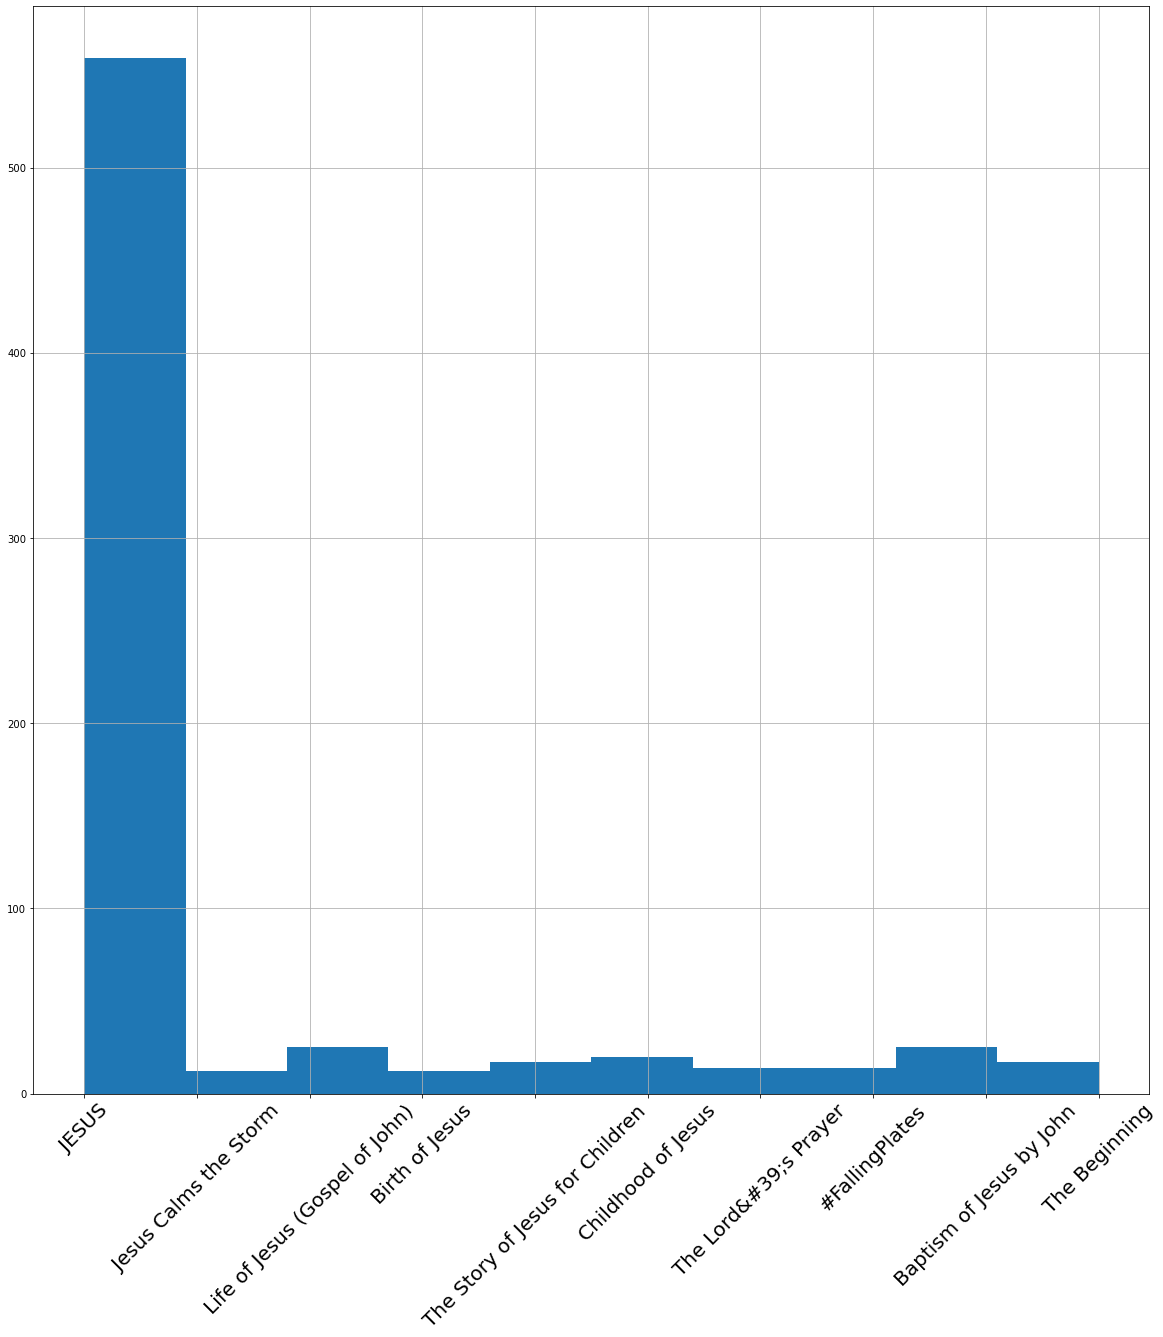

In [49]:
df_ten['video_title'].hist(figsize=(20,20), 
                           bins=len(df_ten['video_title'].value_counts()),
                           xrot=45,
                           xlabelsize=20);

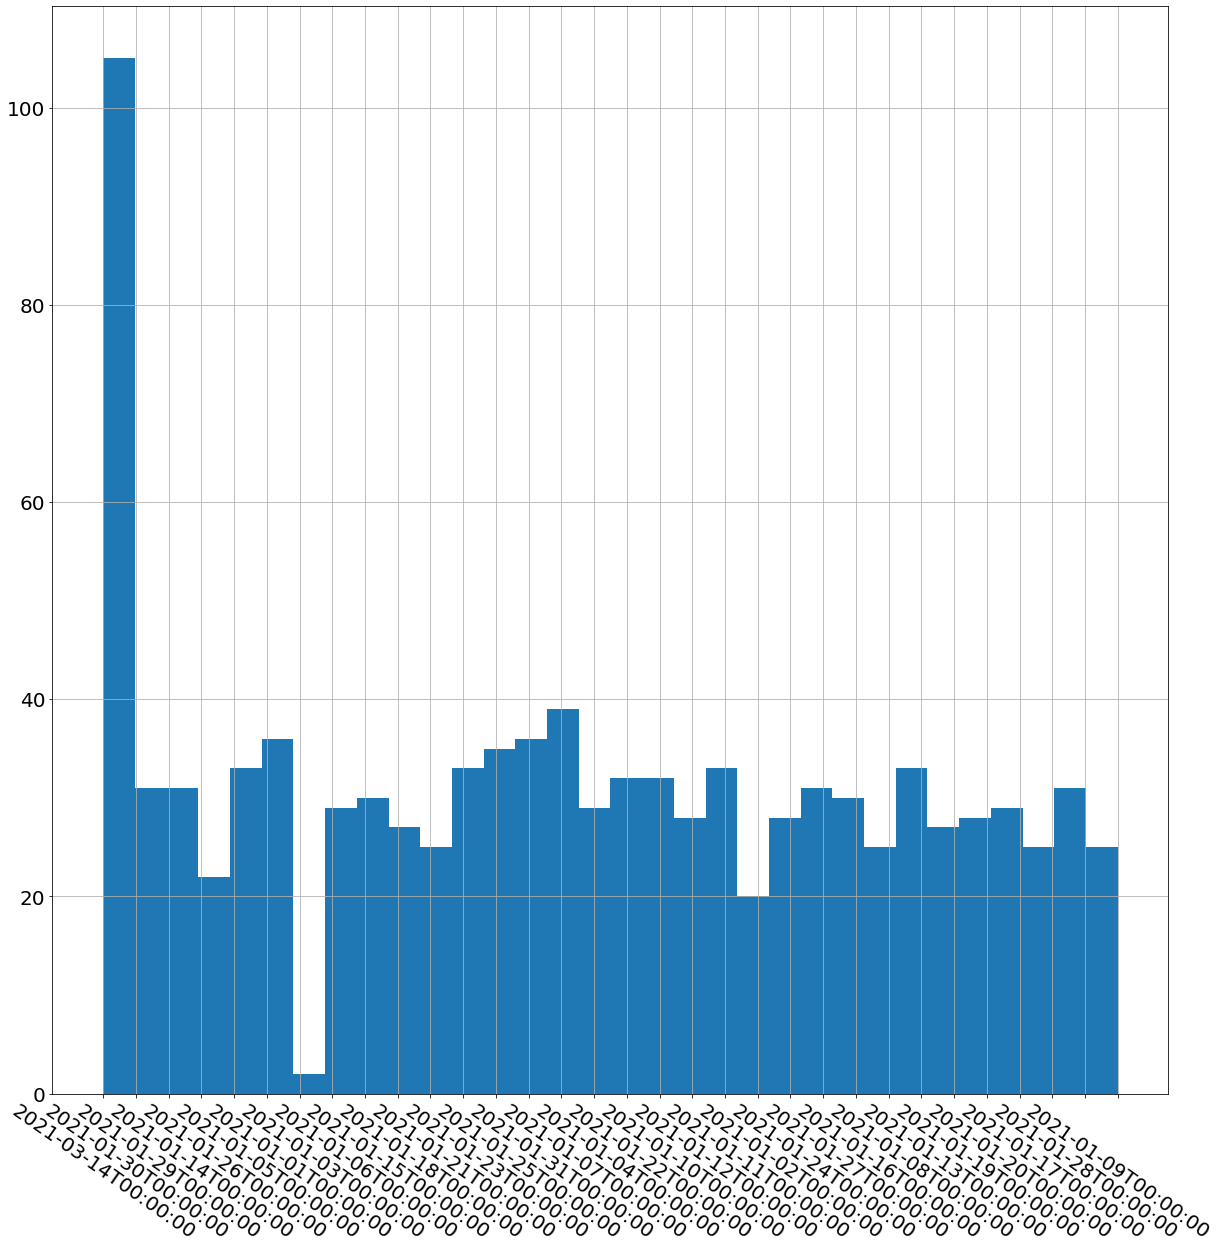

In [50]:
df.event_date_partition.hist(figsize=(20,20), 
                             bins=len(df.event_date_partition.value_counts()),
                            xrot=325,
                           xlabelsize=20,
                            ylabelsize=20);

In [16]:
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

In [75]:
df.geo__country.value_counts().to_frame()

,geo__country
United States,165
India,163
Egypt,41
Nigeria,36
Bangladesh,36
...,...
Kuwait,1
Venezuela,1
Botswana,1
Czechia,1


In [74]:
df.geo__country.value_counts()

United States    165
India            163
Egypt             41
Nigeria           36
Bangladesh        36
                ... 
Kuwait             1
Venezuela          1
Botswana           1
Czechia            1
Niger              1
Name: geo__country, Length: 112, dtype: int64

In [73]:
df['count_of_country']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: count_of_country, Length: 1000, dtype: float64

In [55]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")

#configure_plotly_browser_state()
px.scatter_mapbox(df, lat="latitude", 
                  lon="longitude", 
                  size= geo_cords),
                  size_max=30, 
                  zoom=3, 
                  width=1200, 
                  height=800)


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [143]:
coords = df[['latitude', 'longitude']]

numpy.float64

In [144]:
distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').